In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [2]:
print(len(tfds.list_builders()))
print(tfds.list_builders())

413
['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'asu_table_top_converted_externally_to_rlds', 'austin_buds_dataset_converted_externally_to_rlds', 'austin_sailor_dataset_converted_externally_to_rlds', 'austin_sirius_dataset_converted_externally_to_rlds', 'bair_robot_pushing_small', 'bc_z', 'bccd', 'beans', 'bee_dataset', 'beir', 'berkeley_autolab_ur5', 'berkeley_cable_routing', 'berkeley_fanuc_manipulation', 'berkeley_gnm_cory_hall', 'berkeley_gnm_recon', 'berkeley_gnm_sac_son', 'berkeley_mvp_converted_externally_to_rlds', 'berkeley_rpt_converted_externally_to_rlds', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'bot_adversarial_dialogue', 'bridge', 'bucc', 'c4', 'c4_wsrs', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava'

In [3]:
data, info = tfds.load('mnist', with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\euiso\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


In [4]:
ds_train = data['train']
print(len(ds_train))

60000


In [5]:
ds_train = ds_train.map(lambda x: (x['image'], x['label']))
ds_train = ds_train.filter(lambda x, y: y is not None)
ds_train = ds_train.shuffle(12000).batch(60000)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1].shape)
print(type(batch[0]), type(batch[1]))
print(batch[1])

x_train , y_train = batch
print(x_train.shape, y_train.shape)
print(type(x_train), type(y_train))

(60000, 28, 28, 1) (60000,)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor([1 1 8 ... 4 8 8], shape=(60000,), dtype=int64)
(60000, 28, 28, 1) (60000,)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


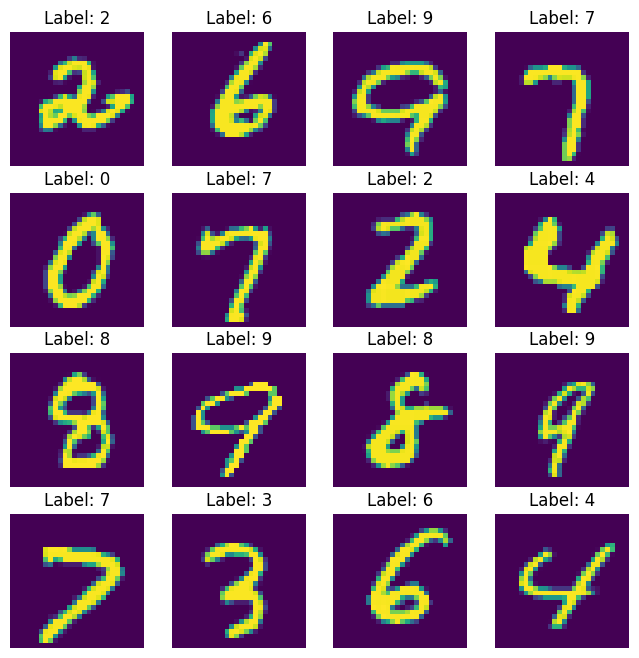

In [6]:
import matplotlib.pyplot as plt
import random

random_idx = np.random.randint(0, len(x_train), size=16)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(random_idx):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[idx])
    plt.title(f"Label: {y_train[idx]}")
    plt.axis("off")

plt.show()

In [7]:
ds_test = data['test']
print(len(ds_test))

10000


In [8]:
ds_test = ds_test.map(lambda x: (x['image'], x['label']))
ds_test = ds_test.shuffle(2000).batch(10000)
batch = next(iter(ds_test))
print(batch[0].shape, batch[1].shape)
print(type(batch[0]), type(batch[1]))

x_test , y_test = batch
print(x_test.shape, y_test.shape)
print(type(x_test), type(y_test))

(10000, 28, 28, 1) (10000,)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
(10000, 28, 28, 1) (10000,)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


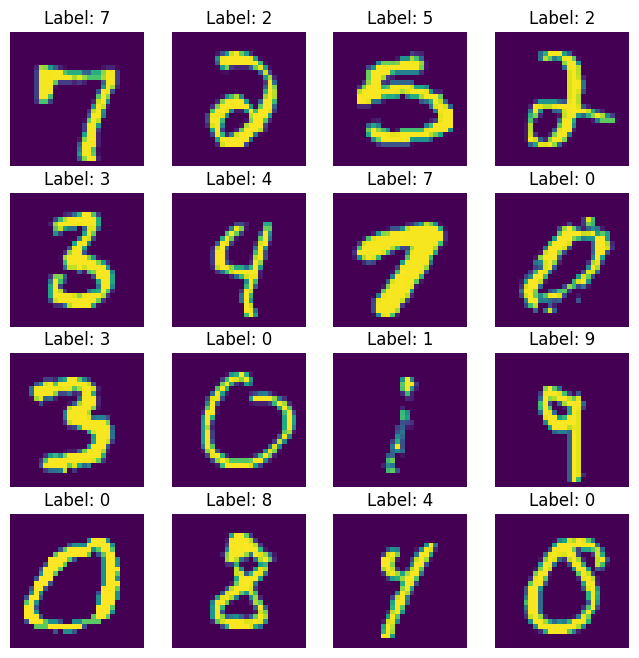

In [9]:
random_idx = np.random.randint(0, len(x_test), size=16)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(random_idx):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"Label: {y_test[idx]}")
    plt.axis("off")

plt.show()

In [10]:
from tensorflow.keras.utils import to_categorical

print(x_train.shape, type(x_train), y_train.shape, type(y_train))

x_train = np.array(x_train) / 255
x_test = np.array(x_test) /255

print(x_train.shape, type(x_train), y_train.shape, type(y_train))

y_train = to_categorical(np.array(y_train))
y_test = to_categorical(np.array(y_test))



(60000, 28, 28, 1) <class 'tensorflow.python.framework.ops.EagerTensor'> (60000,) <class 'tensorflow.python.framework.ops.EagerTensor'>
(60000, 28, 28, 1) <class 'numpy.ndarray'> (60000,) <class 'tensorflow.python.framework.ops.EagerTensor'>


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32,(3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

c:\Users\euiso\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 20, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 882,410 (3.37 MB)

 Trainable params: 882,154 (3.37 MB)

 Non-trainable params: 256 (1.00 KB)

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - acc: 0.8939 - loss: 0.3215 - val_acc: 0.9800 - val_loss: 0.0739
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - acc: 0.9826 - loss: 0.0601 - val_acc: 0.9822 - val_loss: 0.0673
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - acc: 0.9879 - loss: 0.0415 - val_acc: 0.9871 - val_loss: 0.0436
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - acc: 0.9897 - loss: 0.0332 - val_acc: 0.9887 - val_loss: 0.0375
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - acc: 0.9914 - loss: 0.0296 - val_acc: 0.9822 - val_loss: 0.0797
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - acc: 0.9906 - loss: 0.0306 - val_acc: 0.9905 - val_loss: 0.0395
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - acc: 0.9925 - loss: 0.0255 - val_acc: 0.9886 - val_loss: 0.0417
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - acc: 0.9924 - loss: 0.0232 - val_acc: 0.9883 - val_loss: 0.0438
Epoch 9/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 

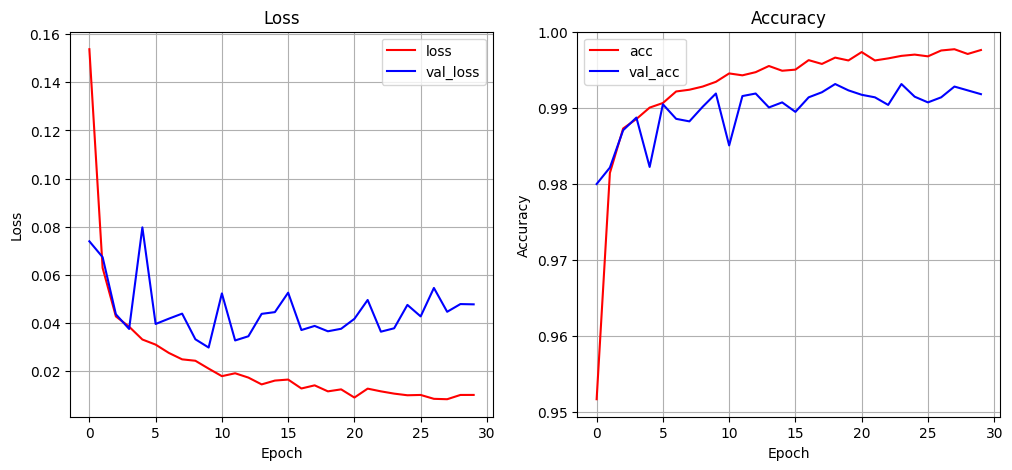

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss', color='red')
plt.plot(history.history['val_loss'], label='val_loss', color='blue')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='acc', color='red')
plt.plot(history.history['val_acc'], label='val_acc', color='blue')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.9934 - loss: 0.0378
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[2.6659249e-18 3.1706097e-13 1.4064995e-12 4.6531400e-11 1.9557179e-07
 5.6154884e-15 6.4517234e-19 9.9999976e-01 1.3700018e-14 1.9882557e-11] 7


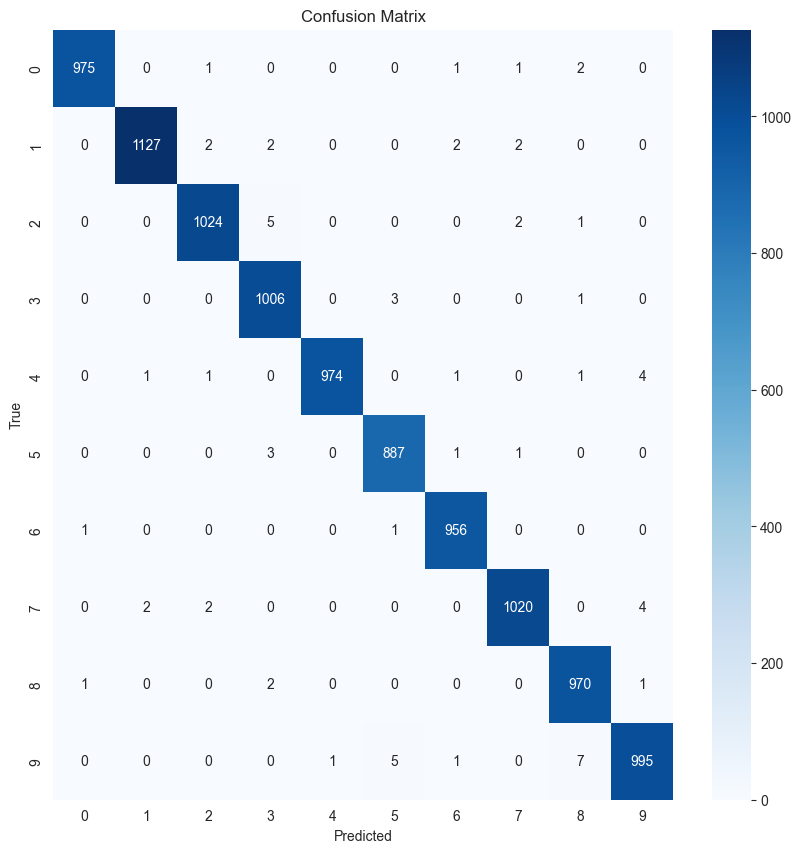

In [14]:
from sklearn.metrics import confusion_matrix

model.evaluate(x_test, y_test)

pred_ys = model.predict(x_test)
print(pred_ys[0], np.argmax(pred_ys[0]))


plt.figure(figsize=(10, 10))
sns.set_style('whitegrid')
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.legend()
# plt.grid()

plt.show()